# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [23]:
#I want to see the names of the reps in the North branch:

unique_reps = north_df['Rep ID'].drop_duplicates()
print(unique_reps)

0      Brent
1        Cam
2       Todd
5       Duke
6        Joe
7      Lilly
11    Amanda
17      Andy
27    Xander
Name: Rep ID, dtype: object


In [24]:
#Finding the total number of reps in the North branch:

num_reps_in_north = north_df['Rep ID'].nunique()
print("Number of reps in the North branch:", num_reps_in_north)

Number of reps in the North branch: 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [26]:
#The names of reps in the South branch:

unique_reps_south = south_df['Rep ID'].drop_duplicates()
print(unique_reps_south)

0       Kate
1       Eric
2      Susan
3      Alice
4      Sandy
5       Karl
8      Randy
9     George
10     Helga
11      Josh
27    Sharon
Name: Rep ID, dtype: object


In [28]:
#Finding the total number of reps in the South branch:

num_reps_in_south = south_df['Rep ID'].nunique()
print("Number of reps in the South branch:", num_reps_in_south)

Number of reps in the South branch: 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [4]:
#Code Used:
north_df.head()

average_busy_minutes = north_df['Busy Minutes'].mean()
average_not_ready_minutes = north_df['Not Ready Minutes'].mean()
average_incoming_wait_time = north_df['Incoming Wait Time'].mean()
average_during_call_wait_time = north_df['During Call Wait Time'].mean()

print("Average Busy Minutes for the North branch:", average_busy_minutes)
print("Average Not Ready Minutes for the North branch:", average_not_ready_minutes)
print("Average Incoming Wait Time for the North branch:", average_incoming_wait_time)
print("Average During Call Wait Time for the North branch:", average_during_call_wait_time)

Average Busy Minutes for the North branch: 9.987755102040817
Average Not Ready Minutes for the North branch: 1.9142857142857144
Average Incoming Wait Time for the North branch: 3.048780487804878
Average During Call Wait Time for the North branch: 2.9673469387755103


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [31]:
#Code Used:

average_busy_minutes_south = south_df['Busy Minutes'].mean()
average_not_ready_mins_south = south_df['Not Ready Minutes'].mean()
average_incoming_wait_time_south = south_df['Incoming Wait Time'].mean()
average_during_call_wait_south = south_df['During Call Wait Time'].mean()

print("Average Busy Minutes for the South branch:", average_busy_minutes_south)
print("Average Not Ready Minutes for the South branch:", average_not_ready_mins_south)
print("Average Incoming Wait Time for the South branch:", average_incoming_wait_time_south)
print("Average During Call Wait Time for the South branch:", average_during_call_wait_south)

Average Busy Minutes for the South branch: 10.054140127388536
Average Not Ready Minutes for the South branch: 1.910828025477707
Average Incoming Wait Time for the South branch: 3.0
Average During Call Wait Time for the South branch: 3.0764331210191083


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [33]:
# Code Used:
combined_df = pd.concat([north_df, south_df])
calls_per_time_block = combined_df.groupby('Time Block')['Calls'].sum()
print(calls_per_time_block)

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

> Your Answer: To find missing data in the dataframe, we can use 'isnull()' which identifies if each value is missing or not. After that, we can use 'sum()' to count the number of missing values for each column. 

In [34]:
# There were 351 missing values in the 'Incoming Wait Time' column after I performed the below operation:
missing_data = combined_df.isnull().sum()
print(missing_data)


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       351
During Call Wait Time      0
Calls                      0
dtype: int64


In [38]:

# I decided to fill the missing values with 0 in the DataFrame
combined_df.fillna(0, inplace=True)


In [39]:
# Display the count of missing values after transformation
print("Missing data after transformation:")
print(combined_df.isnull().sum())

Missing data after transformation:
Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

> Your Answer: There are two values for 'YES' because one value contains a space after it. To fix the issue I removed the whitespaces in the 'Sale' column using 'str.strip()'.

In [40]:
# Identifying entries with the values other than 'NO' in the 'Sales' column. 

north_df[north_df['Sale']!= 'NO']

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,19,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0,0,11,2,2.0,4,1
40,40,North,Sales Support,12:00 PM,Incoming,B,Lilly,YES,0,0,10,1,3.0,2,1
47,47,North,Sales Support,10:00 AM,Incoming,A,Amanda,YES,0,0,10,3,4.0,3,1
67,67,North,Sales Support,12:00 PM,Incoming,B,Todd,YES,0,0,9,3,5.0,4,1
69,69,North,Sales Support,12:00 PM,Incoming,A,Andy,YES,0,0,10,1,5.0,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
87,87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,NaN,4,1
99,99,North,Sales Support,10:00 AM,Outgoing,A,Andy,YES,0,0,12,2,NaN,2,1
108,108,North,Sales Support,11:00 AM,Outgoing,B,Lilly,YES,0,0,8,3,NaN,2,1
220,220,North,Product Support,4:00 PM,Outgoing,A,Cam,YES,0,0,8,1,NaN,3,1


In [42]:
sales_not_no = north_df[north_df['Sale'] != 'NO']
unique_sales_not_no = sales_not_no['Sale'].unique()
print(unique_sales_not_no)

#The value which was printed before I fixed it: ['YES ', 'YES']

['YES ' 'YES']


In [43]:
# Removing leading and trailing whitespaces from the 'Sale' column
north_df['Sale'] = north_df['Sale'].str.strip()

# Standardize the values to uppercase
north_df['Sale'] = north_df['Sale'].str.upper()

# Verifying the unique values in the 'Sale' column after removing spaces
unique_sales = north_df['Sale'].unique()
print(unique_sales)

['NO' 'YES']


In [47]:
#checking if the code manipulations worked:

sales_not_no = north_df[north_df['Sale'] != 'NO']
unique_sales_not_no = sales_not_no['Sale'].unique()
print(unique_sales_not_no)

['YES']


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicates in the two data sets. To find the count of duplicates I used duplicated().sum() method. 

In [13]:
#Code Used
north_duplicates_count = north_df.duplicated().sum()
print("Number of duplicates in each column of the North dataframe:")
print(north_df.duplicated().sum())

south_duplicates_count = south_df.duplicated().sum()
print("\nNumber of duplicates in each column of the South dataframe:")
print(south_df.duplicated().sum())

Number of duplicates in each column of the North dataframe:
0

Number of duplicates in each column of the South dataframe:
0


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I dropped the "Unnamed: 0" column as it serves no purpose. 

In [48]:
combined_df.head() 

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [66]:
#I dropped the 'Unnamed' column
#combined_df.drop(columns=['Unnamed: 0'], inplace=True)
combined_df.head(10)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [50]:
# Create dataframe for the entire company named df

df = pd.concat([north_df, south_df], ignore_index=True)
#df.drop(columns=['Unnamed: 0'], inplace=True)
print(df)

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
554         309  South  Product Support    5:00 PM             Outgoing     D   
555         310  South  Product Support    5:00 PM             Outgoing     C   
556         311  South  Product Support    5:00 PM             Outgoing     C   
557         312  South  Product Support    5:00 PM             Outgoing     C   
558         313  South  Product Support    5:00 PM             Outgoing     D   

     Rep ID Sale  Lost Call

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls


In [51]:
# Grouping by 'Branch' and 'Rep ID' and summing the 'Calls' for each representative
rep_calls_sum = df.groupby(['Branch', 'Rep ID'])['Calls'].sum().reset_index()

# Sorting the dataframe by 'Calls' in descending order to find the representatives with the highest number of calls
rep_calls_sorted = rep_calls_sum.sort_values(by='Calls', ascending=False)

print(rep_calls_sorted)

   Branch  Rep ID  Calls
2   North   Brent     37
10  South    Eric     35
16  South   Randy     33
17  South   Sandy     32
12  South   Helga     31
6   North   Lilly     30
4   North    Duke     29
7   North    Todd     29
15  South    Kate     29
11  South  George     29
14  South    Karl     28
13  South    Josh     26
19  South   Susan     26
5   North     Joe     26
18  South  Sharon     25
8   North  Xander     24
3   North     Cam     24
1   North    Andy     23
0   North  Amanda     23
9   South   Alice     20


In [52]:
# Group by 'Branch' and sum the 'Calls' for each branch
branch_calls_total = df.groupby('Branch')['Calls'].sum().reset_index()
print(branch_calls_total)

  Branch  Calls
0  North    245
1  South    314


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? Yes, the South branch is below the 2-5% range, which is good. 

In [53]:
# Calculate the number of abandoned calls for each branch
df = pd.concat([north_df, south_df], ignore_index=True)
abandoned_calls_by_branch = df.groupby('Branch')['Abandoned'].sum()
print(abandoned_calls_by_branch)

Branch
North    7
South    4
Name: Abandoned, dtype: int64


In [58]:
# Calculate the total number of calls for each branch
total_calls_by_branch = df.groupby('Branch')['Calls'].sum()
print(total_calls_by_branch)

Branch
North    245
South    314
Name: Calls, dtype: int64


In [59]:
# Calculate the call abandonment rate for each branch
abandonment_rate_by_branch = (abandoned_calls_by_branch / total_calls_by_branch) * 100
print(abandonment_rate_by_branch)

Branch
North    2.857143
South    1.273885
dtype: float64


In [60]:
# Calculate the total number of abandoned calls for the whole company
total_abandoned_calls_company = df['Abandoned'].sum()
print("Total abandoned calls:", total_abandoned_calls_company)

Total abandoned calls: 11


In [61]:
# Calculate the total number of calls for the whole company
total_calls_company = df['Calls'].sum()
print("Total calls:", total_calls_company)

Total calls: 559


In [62]:
# Calculate the call abandonment rate for the whole company
abandonment_rate_company = (total_abandoned_calls_company / total_calls_company) * 100
print("Abandonment rate:", abandonment_rate_company)

Abandonment rate: 1.9677996422182469


In [63]:
# Display the average call abandonment rates for each branch and the whole company
print("Average Call Abandonment Rates:")
print("North Branch =", round(abandonment_rate_by_branch['North'], 2))
print("South Branch =", round(abandonment_rate_by_branch['South'], 2))
print("Company Wide =", round(abandonment_rate_company, 2))

Average Call Abandonment Rates:
North Branch = 2.86
South Branch = 1.27
Company Wide = 1.97


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% (82 calls)
- South Branch = 38.10% (126 calls)
- Company Wide = 39.94% (208 calls)

In [70]:
# Calculate the number of calls answered within 2 seconds for each branch
answered_within_2_seconds_by_branch = df[df['Incoming Wait Time'] <= 2].groupby('Branch')['Calls'].sum()

# Calculate the total number of incoming calls for each branch
# Group by 'Branch' and 'Incoming or Outgoing', then select 'Incoming' rows
incoming_calls_per_branch = df[df['Incoming or Outgoing'] == 'Incoming'] \
    .groupby('Branch')['Calls'].sum().reset_index()
print(incoming_calls_per_branch)

  Branch  Calls
0  North     82
1  South    126


In [77]:
incoming_calls_within_2_seconds = df[(df['Incoming or Outgoing'] == 'Incoming') & (df['Incoming Wait Time'] <= 2)]

# Calculate the total number of incoming calls answered within 2 seconds for each branch and the entire company
incoming_calls_within_2_seconds_per_branch = incoming_calls_within_2_seconds.groupby('Branch')['Incoming Wait Time'].count()
total_incoming_calls_per_branch = df[df['Incoming or Outgoing'] == 'Incoming'].groupby('Branch')['Incoming Wait Time'].count()

# Calculate the total number of incoming calls answered within 2 seconds for the entire company
total_incoming_calls_within_2_seconds = incoming_calls_within_2_seconds['Incoming Wait Time'].count()
total_incoming_calls = df[df['Incoming or Outgoing'] == 'Incoming']['Incoming Wait Time'].count()

# Calculate the percentage of incoming calls answered within 2 seconds for each branch and the entire company
percentage_incoming_calls_within_2_seconds_per_branch = (incoming_calls_within_2_seconds_per_branch / total_incoming_calls_per_branch) * 100
percentage_incoming_calls_within_2_seconds_company = (total_incoming_calls_within_2_seconds / total_incoming_calls) * 100

print("Percentage of incoming calls answered within 2 seconds for each branch:")
print(percentage_incoming_calls_within_2_seconds_per_branch)

print("\nPercentage of incoming calls answered within 2 seconds for the entire company:")
print(percentage_incoming_calls_within_2_seconds_company)

Percentage of incoming calls answered within 2 seconds for each branch:
Branch
North    40.243902
South    38.095238
Name: Incoming Wait Time, dtype: float64

Percentage of incoming calls answered within 2 seconds for the entire company:
38.94230769230769


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.0 seconds
- Company Wide in seconds = 3.02 seconds


In [80]:
incoming_calls_df = df[df['Incoming or Outgoing'] == 'Incoming']

asa_by_branch = incoming_calls_df.groupby('Branch')['Incoming Wait Time'].mean()

# Calculate the average speed of answer (ASA) for the entire company
asa_company = incoming_calls_df['Incoming Wait Time'].mean()

print("Average Speed of Answer (ASA) for each branch:")
print(asa_by_branch)

print("\nAverage Speed of Answer (ASA) for the entire company:")
print(asa_company)

Average Speed of Answer (ASA) for each branch:
Branch
North    3.04878
South    3.00000
Name: Incoming Wait Time, dtype: float64

Average Speed of Answer (ASA) for the entire company:
3.019230769230769


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a vertical bar chart. It displays the average abandonment rate for each queue as a bar, with the x-axis representing the queues and the y-axis representing the average abandonment rate.

C:\Users\syfer\AppData\Local\Temp\ipykernel_5100\1325147293.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


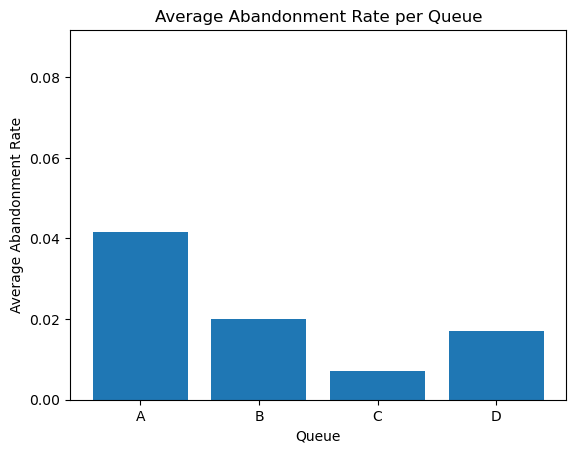

In [47]:
# Create visualization 1 here
# Import any additional libraries needed with alias

import matplotlib.pyplot as plt

# The dictionary abandonment_rates has the data we need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

# A bar chart
plt.bar(abandonment_rates.keys(), abandonment_rates.values())
plt.xlabel("Queue")
plt.ylabel("Average Abandonment Rate")
plt.title("Average Abandonment Rate per Queue")
plt.ylim(0, max(abandonment_rates.values()) + 0.05)  
plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a scatter plot to precisely depict the connection between 'Incoming Wait Time' and 'Service Level'. Each dot represents a North branch representative ('Rep').

In [103]:
# Create visualization 2 here
# north_plt contains the data we need for the average speed of answer of each rep
# average speed of answer is 'Incoming Wait Time' < 2 seconds

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage (Calls within 2 secs / total calls)

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
final_table = pd.merge(north_plt,service_level,on="Rep ID")
final_table = final_table.drop(['Calls_x','Calls_y'],axis = 1)
final_table

,Rep ID,Incoming Wait Time,Service Level %
0,Amanda,2.400000,60.000000
1,Andy,3.600000,30.000000
2,Brent,2.125000,75.000000
3,Cam,2.909091,45.454545
4,Duke,2.785714,42.857143
5,Joe,3.600000,20.000000
6,Lilly,3.083333,33.333333
7,Todd,3.500000,33.333333
8,Xander,3.333333,33.333333


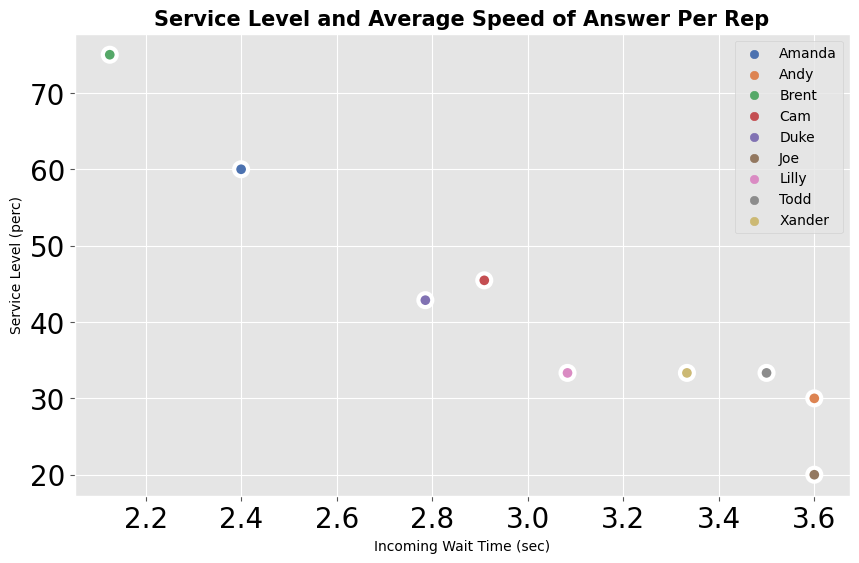

In [102]:
# Setting the style using 'ggplot'
plt.style.use('ggplot')

# Creating the scatterplot
plt.figure(figsize=(10, 6))
sb.scatterplot(data=final_table, x='Incoming Wait Time', y='Service Level %', s=100, hue='Rep ID', linewidth=3, palette='deep')
plt.title('Service Level and Average Speed of Answer Per Rep', color='black', fontsize=15, fontweight='bold')
plt.xlabel('Incoming Wait Time (sec)', color='black', fontsize=10)
plt.ylabel('Service Level (perc)', color='black', fontsize=10)
plt.legend(fontsize=10)
plt.xticks(color='black', fontsize=20)
plt.yticks(color='black', fontsize=20)
#plt.savefig('scatter_north.png')
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: It's a stacked bar chart. The chart displays the number of incoming and outgoing calls for each call purpose, and the bars are stacked on top of each other to represent the total number of calls.

In [111]:
# The three dictionaries, complaints, sales_support, and product_support, have the information we need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


<Figure size 1000x600 with 0 Axes>

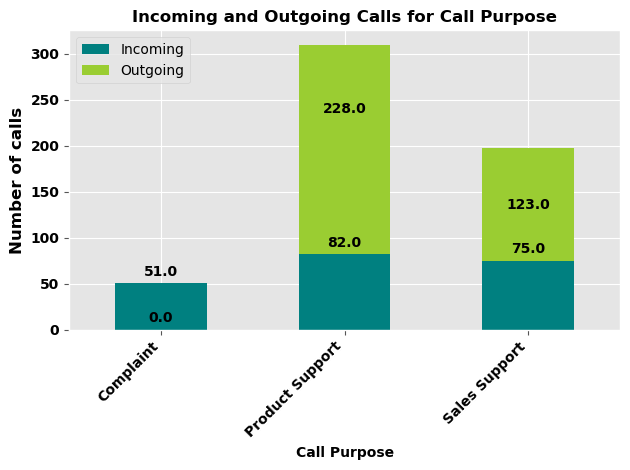

In [112]:
#Visualization 3:
purpose_counts = df.groupby(["Call Purpose", "Incoming or Outgoing"]).size().unstack()

plt.figure(figsize=(10, 6))
ax = purpose_counts.plot(kind='bar', stacked=True, color=['teal', 'yellowgreen'])

plt.xlabel('Call Purpose', color='black', fontsize=10, fontweight='bold')
plt.ylabel('Number of calls', color='black', fontsize=12, fontweight='bold')
plt.title('Incoming and Outgoing Calls for Call Purpose', color='black', fontsize=12, fontweight='bold')

# Adding text labels on top of each color block
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.legend(['Incoming', 'Outgoing'], loc='upper left', prop={'size': 10}, fontsize=10)
plt.xticks(rotation=45, ha='right', color='black', fontsize=10, fontweight='bold')
plt.yticks(color='black', fontsize=10, fontweight='bold')
plt.tight_layout()
#plt.savefig('Complaints_and_support_grouped_bar_with_labels.png')
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The South branch is operating more effectively, because it's call abandonment rate is lower than the North branch, it received 314 calls total while the North branch received 245 calls total. The service level is slightly lower than the North branch, but it's not that critical. The average speed of answer is almost the same. 

Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27

Branch  Calls
North    245
South    314

Percentage of calls answered within 2 seconds, include # of calls:

- North Branch = 40.24%
- South Branch = 38.09%
- Company Wide = 39.94%

Average speed of answer (rounded to nearest hundredth):

- North Branch in seconds = 3.04 seconds
- South Branch in seconds = 3.0 seconds
- Company Wide in seconds = 3.02 seconds



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The South branch has 11 representatives while the North branch has 9 reps. The North branch will benefit from extra help. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: No. I can see the pattern with the data available. 



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart. It provides a visual comparison of the number of incoming and outgoing calls for the "Complaint" call purpose in different time blocks, making it easier to analyze call volumes during specific periods.


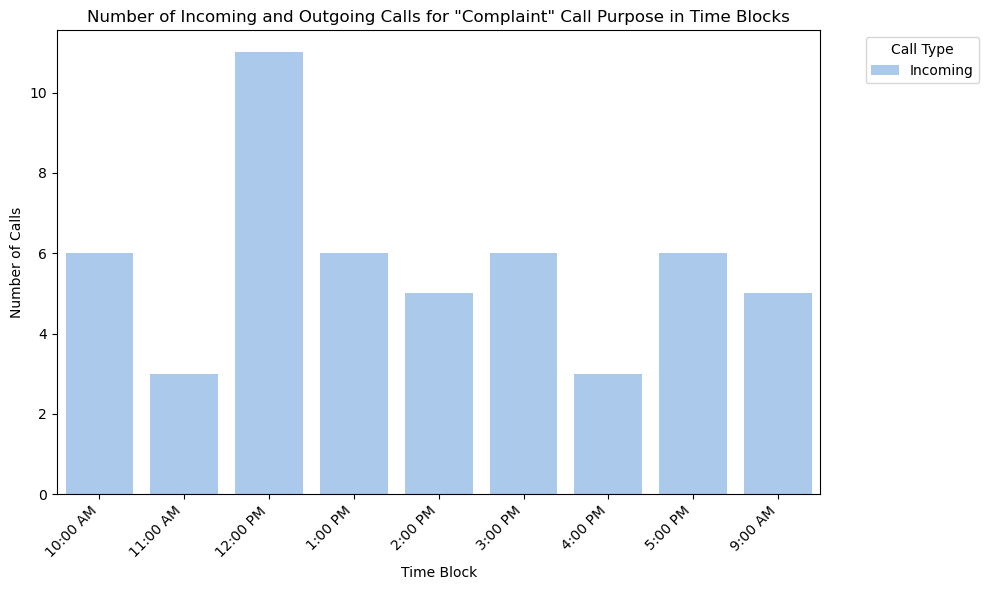

In [31]:
# Create your Bonus Mission visualization here!
import seaborn as sns

call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Group the data by 'Call Purpose'
grouped_data = call_times.groupby('Call Purpose')

# Get the data for the specific call purpose "Complaint"
call_purpose_complaint = grouped_data.get_group('Complaint')

# Group the data for the specific call purpose by 'Time Block' and 'Incoming or Outgoing', and calculate the sum of calls
complaint_grouped = call_purpose_complaint.groupby(['Time Block', 'Incoming or Outgoing'])['Calls'].sum().reset_index()

# Create the visualization using a grouped bar chart
plt.figure(figsize=(10, 6))

# Use seaborn barplot to plot the data
sns.barplot(x='Time Block', y='Calls', hue='Incoming or Outgoing', data=complaint_grouped, palette='pastel')

plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.title('Number of Incoming and Outgoing Calls for "Complaint" Call Purpose in Time Blocks')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Call Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()